[*********************100%%**********************]  1 of 1 completed

13:51:18 - cmdstanpy - INFO - Chain [1] start processing


13:51:19 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\dervi\AppData\Local\Temp\ipykernel_19288\1472876459.py:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


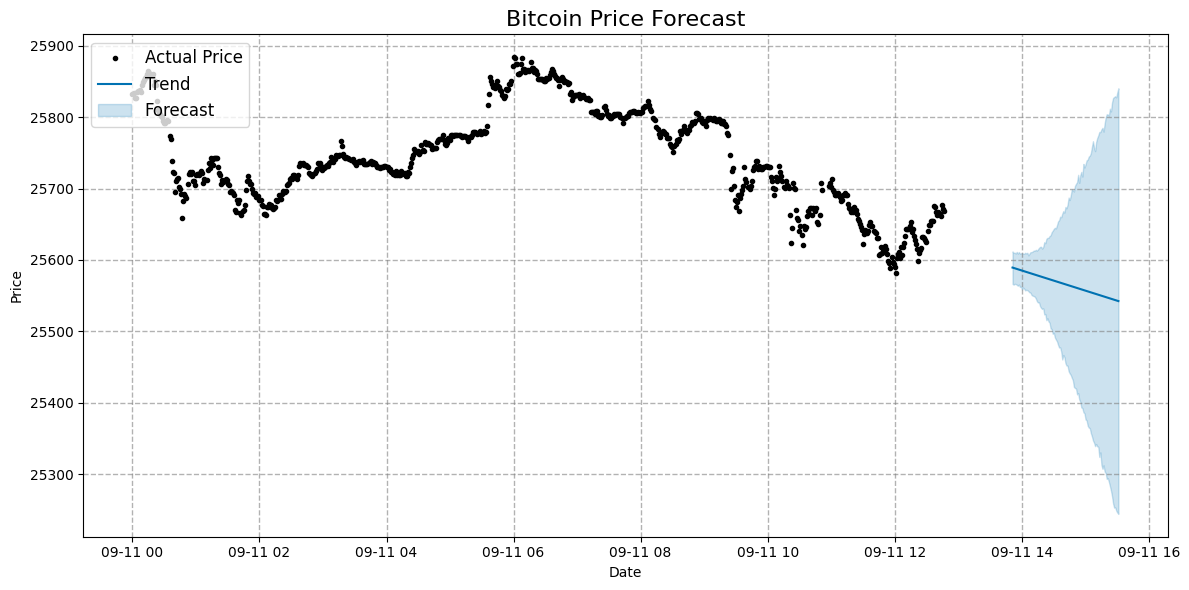

                            ds          yhat    yhat_lower    yhat_upper
0   2023-09-11 13:51:18.334876  25589.256272  25566.453554  25611.877092
1   2023-09-11 13:52:18.334876  25588.787005  25565.314249  25609.842598
2   2023-09-11 13:53:18.334876  25588.317738  25566.473823  25610.163424
3   2023-09-11 13:54:18.334876  25587.848470  25566.161935  25608.965225
4   2023-09-11 13:55:18.334876  25587.379203  25565.250525  25611.210634
..                         ...           ...           ...           ...
96  2023-09-11 15:27:18.334876  25544.206619  25253.061130  25828.116058
97  2023-09-11 15:28:18.334876  25543.737351  25253.258277  25829.245553
98  2023-09-11 15:29:18.334876  25543.268084  25248.785807  25827.649240
99  2023-09-11 15:30:18.334876  25542.798817  25246.114065  25834.847923
100 2023-09-11 15:31:18.334876  25542.329550  25244.274731  25840.366220

[101 rows x 4 columns]


In [4]:
import pandas as pd
from prophet import Prophet
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Define the date and time for which you want to make predictions (current date and time)
now = datetime.now()

# Calculate the end time for predictions (100 minutes from now)
end_time = now + timedelta(minutes=100)

# Create a list of timestamps for the next 100 minutes at 1-minute intervals
timestamps = pd.date_range(start=now, end=end_time, freq='1T')

# Create a DataFrame with the timestamps
future = pd.DataFrame({'ds': timestamps})

# Download historical data for Bitcoin (adjust as needed)
data = yf.download('BTC-USD', period='1d', interval='1m')  # 1 day of 1-minute data for Bitcoin

# Prepare data for Prophet
data = data.reset_index()  # Reset the index to access the 'ds' and 'y' columns
data = data[['Datetime', 'Close']]  # Keep only 'Datetime' and 'Close' columns
data.rename(columns={'Datetime': 'ds', 'Close': 'y'}, inplace=True)  # Rename columns to 'ds' and 'y'
data['ds'] = data['ds'].dt.tz_localize(None)

# Create and fit the Prophet model
model = Prophet()
model.fit(data)

# Make predictions
forecast = model.predict(future)

# Visualize the forecast with custom settings
fig = model.plot(forecast, xlabel='Date', ylabel='Price', figsize=(12, 6))
plt.title('Bitcoin Price Forecast', fontsize=16)  # Update the title
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(['Actual Price', 'Trend', 'Forecast', 'Uncertainty'], loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

# Access the forecasted values
forecasted_values = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print(forecasted_values)
